# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [61]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.mlab as mlab
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')

In [4]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [33]:
df.shape

(130, 3)

In [12]:
dft = df['temperature'] 

In [13]:
dft.head()

0    99.3
1    98.4
2    97.8
3    99.2
4    98.0
Name: temperature, dtype: float64

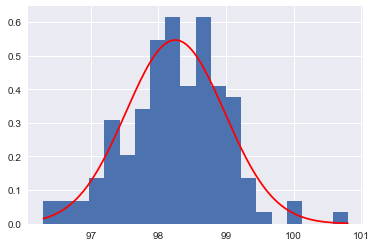

In [60]:
n,bins,patches = plt.hist(dft, 20, normed=True)
mean = np.mean(dft)
std = np.std(dft)
x = np.linspace(min(dft),max(dft),len(dft))
plt.plot(x,mlab.normpdf(x,mean,std),color='r')

##### Q1. Is the distribution of body temperatures normal? Yes, the data looks about normally distributed

In [27]:
dft.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [29]:
np.mean(dft)

98.24923076923078

##### Q2. The observations are independent and the sample size is large enough (>40) to satisfy the CLT since the distribution is roughly normal

##### Q3. To determine the true population, we use one sample Z statistic here, since we are only looking at one set of samples and the n is more than 30.

In [78]:
z_score = (98.6-mean)/(std/np.sqrt(129))
z_score

5.4548232923640789

In [86]:
1-stats.norm.cdf(z_score)

2.4510785068265761e-08

###### The P-Value is less than 0.05. So, we can reject the null hypothesis that the mean is temperature is 98.6. The t-score and the z-score would be approximately the same here because the n is > 30.

##### Q4. The confidence interval at 95% will give us the range, out of which the temperature is considered abnormal.

In [87]:
stats.norm.interval(0.95, loc=mean, scale=std) #confidence interval

(96.81775582674824, 99.680705711713316)

In [94]:
moe = 1.96*(std/np.sqrt(129)) #margin of error
moe

0.12603665700226638

##### Q5. Is there a significant difference between males and females in normal temperature?

In [118]:
dfm = df[df.gender == 'M']
dfm = dfm['temperature']
dfm.head()

2     97.8
5     99.2
6     98.0
7     98.8
12    98.2
Name: temperature, dtype: float64

In [119]:
dff = df[df.gender == 'F']
dff = dff['temperature']
dff.head()

0    99.3
1    98.4
3    99.2
4    98.0
8    98.4
Name: temperature, dtype: float64

In [123]:
mmean,fmean = dfm.mean(), dff.mean()
mmean,fmean

(98.1046153846154, 98.39384615384613)

In [124]:
mstd, fstd = dfm.std(), dff.std()
mstd, fstd

(0.6987557623265908, 0.7434877527313665)

In [135]:
z_score1 = (fmean-mmean)/np.sqrt(mstd/65 + fstd/65)

In [136]:
z_score1

1.9416988505148356

In [137]:
1-stats.norm.cdf(z_score1) #p-value

0.026086783977408157

In [139]:
p = stats.ttest_ind(dfm,dff)
p

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

#### Since p < 0.05 at 95% confidence intervaal, we reject the null hypothesis that the temperatures of male and female are the same.